<a href="https://colab.research.google.com/github/solcanalla/fiumark/blob/main/redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo: Redes Neuronales #


##Inicialización##

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import keras
from keras.datasets import mnist
from keras import backend as K
from keras.models import load_model
import tensorflow as tf
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

In [2]:
!git clone https://github.com/solcanalla/fiumark.git
%cd fiumark
!git pull origin main
import preprocessing as pp

Cloning into 'fiumark'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 299 (delta 12), reused 11 (delta 5), pack-reused 272
Receiving objects: 100% (299/299), 1.29 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/fiumark
From https://github.com/solcanalla/fiumark
 * branch            main       -> FETCH_HEAD
Already up to date.


##Pre procesamiento##

In [3]:
pd.options.display.max_columns = None
df = pp.get_dataset()
df = pp.common_preprocessing(df)
X_train, X_test, y_train, y_test = pp.get_train_test_data(df)

##Entrenamiento##

Al ser una red neuronal no vamos a utilizar GridSearch para buscar hiperparámetros, entonces vamos a probar algunas variantes cambiando: optimizadores, cantidades de capas, neuronas y funciones de activación.

In [4]:
num_classes = 2
adam = tf.keras.optimizers.Adam(lr=0.0006)


###Modelo 1 - Simple###

In [5]:
es1 = EarlyStopping(monitor='val_auc',patience=60, mode='max')
mc1 = ModelCheckpoint('mejor_modelo1.h5', monitor='val_auc', mode='max')

model1 = Sequential()
model1.add(Dense(15, input_shape=(13,), activation='tanh')) #Cantidad de columnas 13
model1.add(Dense(num_classes, activation="softmax")) #Esta capa siempre la mantengo.
model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=[tf.keras.metrics.AUC()]) 

In [6]:
#Entreno
history = model1.fit(X_train.values,keras.utils.to_categorical(y_train, 2),epochs=500, validation_data=(X_test.values, keras.utils.to_categorical(y_test, 2)),callbacks=[es1,mc1])

Epoch 1/500
20/20 [==============================] - 1s 32ms/step - loss: 1.0688 - auc: 0.3762 - val_loss: 0.9050 - val_auc: 0.4779
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.9067 - auc: 0.4270 - val_loss: 0.8062 - val_auc: 0.4807
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.8085 - auc: 0.4330 - val_loss: 0.7399 - val_auc: 0.4681
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.7726 - auc: 0.3636 - val_loss: 0.7006 - val_auc: 0.4706
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.7174 - auc: 0.3957 - val_loss: 0.6802 - val_auc: 0.6296
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6817 - auc: 0.6479 - val_loss: 0.6724 - val_auc: 0.6214
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6807 - auc: 0.6280 - val_loss: 0.6701 - val_auc: 0.6142
Epoch 8/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6700 - 

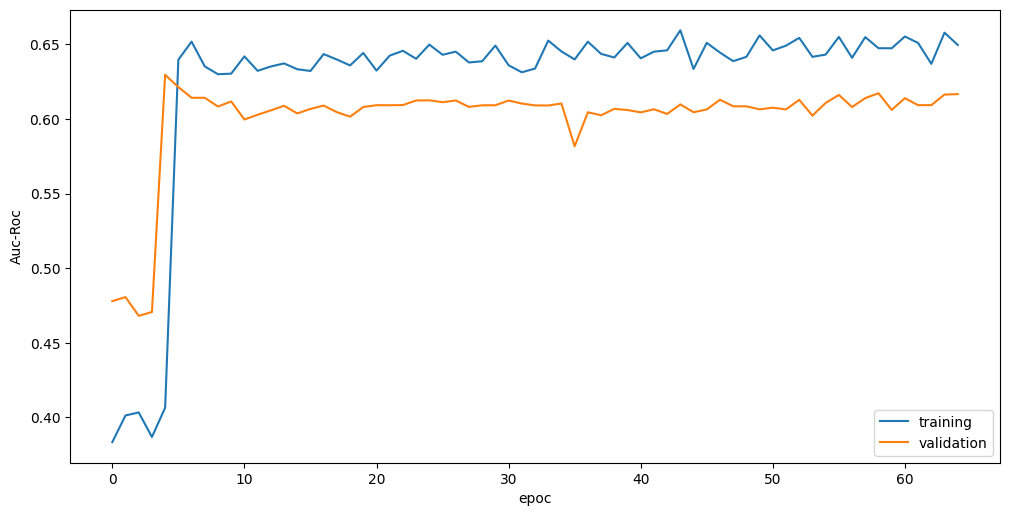

In [7]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Auc-Roc")
plt.xlabel("epoc")
plt.plot(history.history["auc"], label="training")
plt.plot(history.history["val_auc"], label="validation")
plt.legend()

In [8]:
best_score = max(history.history['val_auc'])
print(best_score)

0.6295666694641113


###Modelo 2 - Más neuronas### 

In [9]:
es2 = EarlyStopping(monitor='val_auc_1',patience=60, mode='max')
mc2 = ModelCheckpoint('mejor_modelo2.h5', monitor='val_auc_1', mode='max')

model2 = Sequential()
model2.add(Dense(50, input_shape=(13,), activation='tanh'))
model2.add(Dense(num_classes, activation="softmax"))
model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=[tf.keras.metrics.AUC()])

history2 = model2.fit(X_train.values,keras.utils.to_categorical(y_train, 2),epochs=500, validation_data=(X_test.values, keras.utils.to_categorical(y_test, 2)), callbacks=[es2, mc2])

Epoch 1/500
20/20 [==============================] - 1s 17ms/step - loss: 1.1027 - auc_1: 0.6485 - val_loss: 0.7357 - val_auc_1: 0.4350
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6947 - auc_1: 0.5771 - val_loss: 0.7121 - val_auc_1: 0.6015
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6831 - auc_1: 0.6374 - val_loss: 0.6796 - val_auc_1: 0.6157
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6522 - auc_1: 0.6433 - val_loss: 0.6601 - val_auc_1: 0.6395
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6133 - auc_1: 0.7191 - val_loss: 0.6656 - val_auc_1: 0.6427
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6352 - auc_1: 0.7006 - val_loss: 0.6657 - val_auc_1: 0.6397
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6251 - auc_1: 0.6969 - val_loss: 0.6867 - val_auc_1: 0.6415
Epoch 8/500
20/20 [==============================] - 0

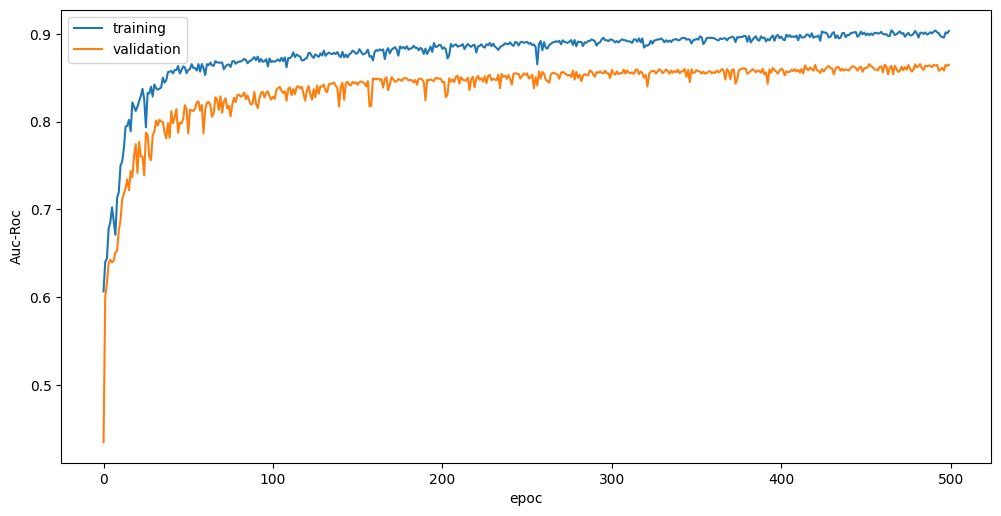

In [10]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Auc-Roc")
plt.xlabel("epoc")
plt.plot(history2.history["auc_1"], label="training")
plt.plot(history2.history["val_auc_1"], label="validation")
plt.legend()

In [11]:
best_score2 = max(history2.history['val_auc_1'])
print(best_score2)

0.8655530214309692


###Modelo 3 - Más capas###

Tomo como base el modelo 2 ya que aumentando las neuronas vi una mejora.
Como agrego más capas, agrego regularización también.

In [12]:
es3 = EarlyStopping(monitor='val_auc_2',patience=60, mode='max')
mc3 = ModelCheckpoint('mejor_modelo3.h5', monitor='val_auc_2', mode='max')

model3 = Sequential()
model3.add(Dense(50,activation='tanh',input_shape=(13,),kernel_regularizer=l2(0.001)))
model3.add(Dense(10,activation='tanh',kernel_regularizer=l2(0.001)))
model3.add(Dense(50,activation='tanh',kernel_regularizer=l2(0.001)))
model3.add(Dense(num_classes,activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer=adam,metrics=[tf.keras.metrics.AUC()])
history3 = model3.fit(X_train.values,keras.utils.to_categorical(y_train, 2),epochs=500, validation_data=(X_test.values, keras.utils.to_categorical(y_test, 2)), callbacks=[es3, mc3])

Epoch 1/500
20/20 [==============================] - 1s 20ms/step - loss: 0.7668 - auc_2: 0.5602 - val_loss: 0.7325 - val_auc_2: 0.6196
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.7017 - auc_2: 0.6485 - val_loss: 0.7042 - val_auc_2: 0.6507
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6814 - auc_2: 0.6874 - val_loss: 0.6821 - val_auc_2: 0.6939
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6456 - auc_2: 0.7348 - val_loss: 0.6608 - val_auc_2: 0.7115
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6550 - auc_2: 0.7205 - val_loss: 0.6301 - val_auc_2: 0.7554
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5787 - auc_2: 0.8181 - val_loss: 0.6791 - val_auc_2: 0.7290
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5899 - auc_2: 0.7916 - val_loss: 0.7196 - val_auc_2: 0.7115
Epoch 8/500
20/20 [==============================] - 0

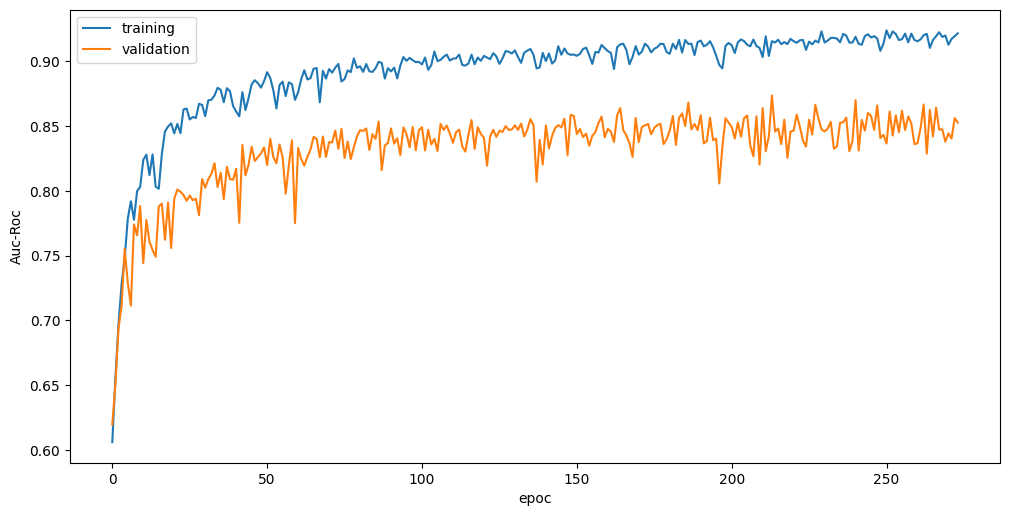

In [13]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Auc-Roc")
plt.xlabel("epoc")
plt.plot(history3.history["auc_2"], label="training")
plt.plot(history3.history["val_auc_2"], label="validation")
plt.legend()

In [14]:
best_score3 = max(history3.history['val_auc_2'])
print(best_score3)

0.8736159801483154


###Modelo 4 - Diferente función de activación###

En este caso como el modelo 3 no mejoró la métrica, sino todo lo contrario. Vuelvo a decrementar las capas.

In [15]:
es4 = EarlyStopping(monitor='val_auc_3',patience=60, mode='max')
mc4 = ModelCheckpoint('mejor_modelo4.h5', monitor='val_auc_3', mode='max')

model4 = Sequential()
model4.add(Dense(50,activation='sigmoid',input_shape=(13,)))
model4.add(Dense(num_classes,activation='softmax'))
model4.compile(loss='categorical_crossentropy',optimizer=adam,metrics=[tf.keras.metrics.AUC()])
history4 = model4.fit(X_train.values,keras.utils.to_categorical(y_train, 2),epochs=500, validation_data=(X_test.values, keras.utils.to_categorical(y_test, 2)), callbacks=[es4, mc4])

Epoch 1/500
20/20 [==============================] - 1s 17ms/step - loss: 0.6622 - auc_3: 0.6572 - val_loss: 0.6906 - val_auc_3: 0.5921
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6679 - auc_3: 0.6288 - val_loss: 0.6969 - val_auc_3: 0.5832
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6547 - auc_3: 0.6458 - val_loss: 0.6833 - val_auc_3: 0.6002
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6491 - auc_3: 0.6576 - val_loss: 0.6854 - val_auc_3: 0.5901
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6562 - auc_3: 0.6514 - val_loss: 0.6928 - val_auc_3: 0.5999
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6451 - auc_3: 0.6806 - val_loss: 0.6824 - val_auc_3: 0.6020
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6339 - auc_3: 0.6972 - val_loss: 0.6752 - val_auc_3: 0.6266
Epoch 8/500
20/20 [==============================] - 0

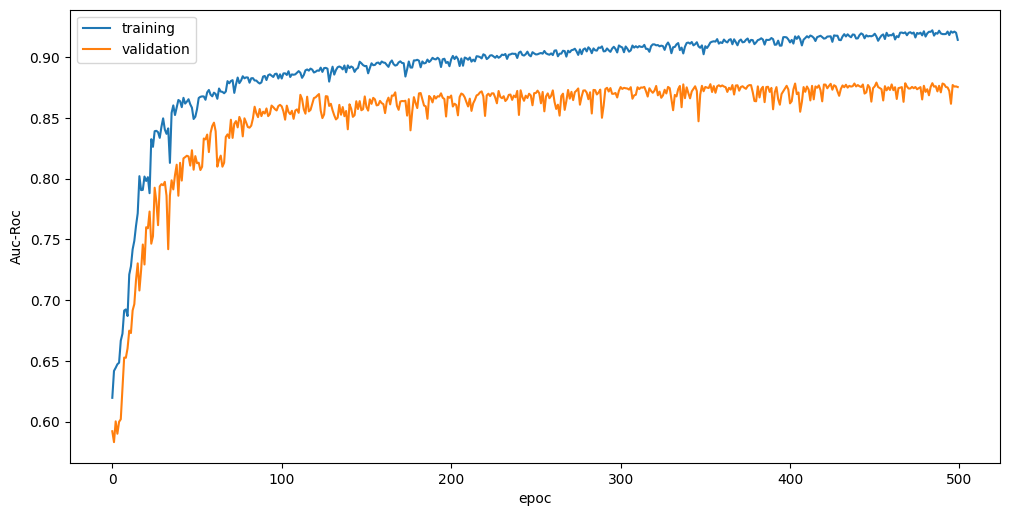

In [16]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Auc-Roc")
plt.xlabel("epoc")
plt.plot(history4.history["auc_3"], label="training")
plt.plot(history4.history["val_auc_3"], label="validation")
plt.legend()

In [17]:
best_score4 = max(history4.history['val_auc_3'])
print(best_score4)

0.8789206147193909


###Modelo 5 - Diferente optimizador###

Sigo teniendo el modelo 2 como elección, intento cambiando el optimizador.

In [18]:
es5 = EarlyStopping(monitor='val_auc_4',patience=60, mode='max')
mc5 = ModelCheckpoint('mejor_modelo5.h5', monitor='val_auc_4', mode='max')

model5 = Sequential()
model5.add(Dense(50,activation='tanh',input_shape=(13,)))
model5.add(Dense(num_classes,activation='softmax'))
opt = keras.optimizers.RMSprop(lr=0.0005)
model5.compile(loss='categorical_crossentropy',optimizer=opt,metrics=[tf.keras.metrics.AUC()])
history5 = model5.fit(X_train.values,keras.utils.to_categorical(y_train, 2),epochs=500, validation_data=(X_test.values, keras.utils.to_categorical(y_test, 2)), callbacks=[es5, mc5])

Epoch 1/500
20/20 [==============================] - 1s 17ms/step - loss: 1.0358 - auc_4: 0.6239 - val_loss: 0.9128 - val_auc_4: 0.5492
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.7839 - auc_4: 0.6267 - val_loss: 0.7561 - val_auc_4: 0.5451
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6764 - auc_4: 0.6278 - val_loss: 0.7115 - val_auc_4: 0.5631
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6608 - auc_4: 0.6358 - val_loss: 0.7008 - val_auc_4: 0.5686
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6648 - auc_4: 0.6266 - val_loss: 0.6944 - val_auc_4: 0.5682
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6749 - auc_4: 0.6010 - val_loss: 0.6958 - val_auc_4: 0.5685
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6549 - auc_4: 0.6412 - val_loss: 0.6963 - val_auc_4: 0.5779
Epoch 8/500
20/20 [==============================] - 0

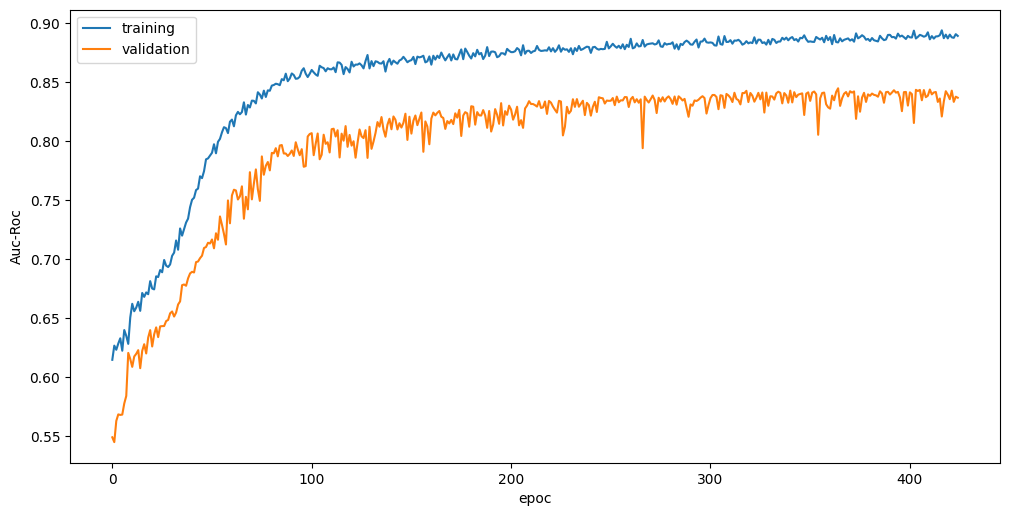

In [19]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Auc-Roc")
plt.xlabel("epoc")
plt.plot(history5.history["auc_4"], label="training")
plt.plot(history5.history["val_auc_4"], label="validation")
plt.legend()

In [20]:
best_score5 = max(history5.history['val_auc_4'])
print(best_score5)

0.8449134230613708


##Evaluación del modelo##

Me quedo con el modelo 2 y hago la evaluación

In [21]:
model = mc2.model

In [22]:
y_pred = model2.predict(X_test) 
y_pred = np.argmax(y_pred, axis=1, out=None)

###Precisión recall y F1-score###

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        95
           1       0.76      0.71      0.73        66

    accuracy                           0.79       161
   macro avg       0.78      0.78      0.78       161
weighted avg       0.79      0.79      0.79       161



###Accuracy###

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7888198757763976

###AUC-ROC###

In [25]:
from sklearn.metrics import roc_curve, auc

def plot_roc(_fpr, _tpr, x):

    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(15, 10))
    plt.plot(
        _fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})'
    )
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, y_pred)
auc_roc

0.7771132376395534

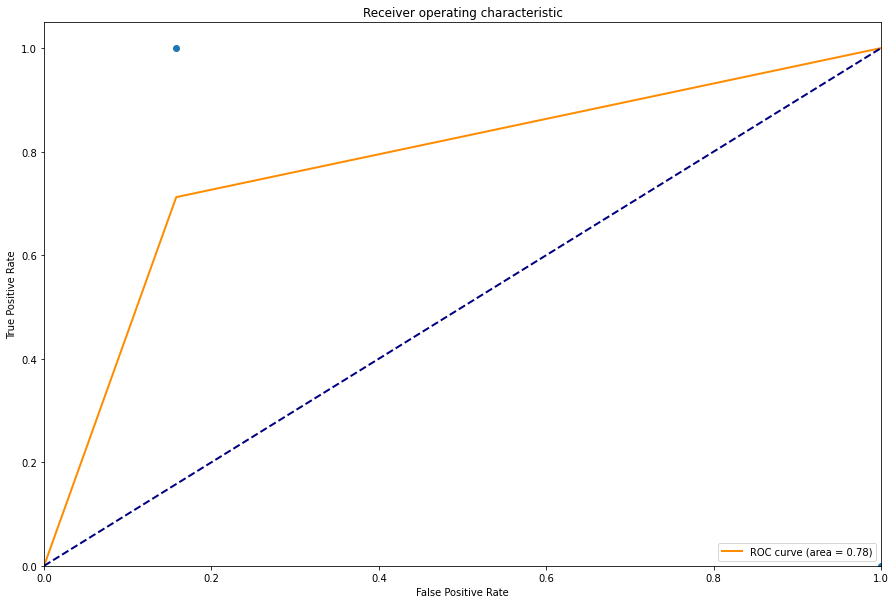

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc(fpr, tpr, thresholds)

###Matriz de confusión###

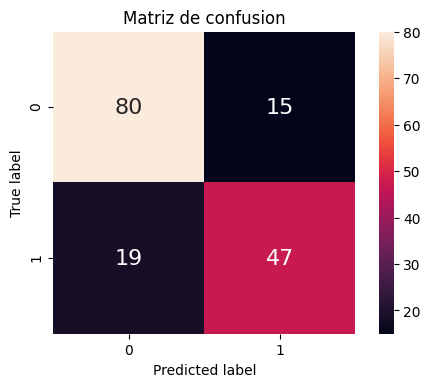

In [28]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    names = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, names)
    df_cm = pd.DataFrame(cm, names, names)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


plot_confusion_matrix(y_test, y_pred)

##Predicción##

In [29]:
X_holdout = pd.read_csv('https://drive.google.com/uc?export=download&id=1I980-_K9iOucJO26SG5_M8RELOQ5VB6A')
X_holdout = pp.common_preprocessing(X_holdout)
prediction = model.predict(X_holdout)
pred_hold = np.argmax(prediction, axis=1, out=None)
df2 = pd.DataFrame(pred_hold,columns=['volveria'])
df3 = pd.concat([X_holdout.id_usuario,df2],axis=1)
df3.to_csv('redesneuronales.csv')
df3

,id_usuario,volveria
0,650,1
1,234,0
2,31,1
3,552,0
4,411,0
...,...,...
85,354,0
86,82,0
87,172,0
88,8,0
